<a href="https://colab.research.google.com/github/Ramadhan666/PCVK_Genap_2021/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.**

**2. Berikut merupakan langkah-langkah yang dapat dilakukan:**

>a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.                              
>b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

Mounted at /content/drive



>c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.

In [3]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return new_image

>d. Load citra yang akan diproses dan ubah menjadi citra keabuan

In [4]:
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
img = cv.resize(original, (0,0), fx=0.5, fy=0.5) 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

>e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening sebagai berikut:

**Sharpen**

In [5]:
kernal_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

>f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil konvolusinya:*teks yang dimiringkan*

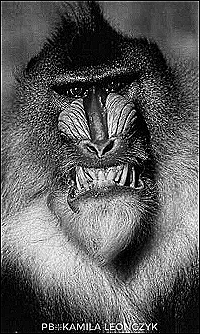

In [6]:
cv2_imshow(convolution2d(img_gray,kernal_sharpen,1,2))

**3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut:**

**Emboss**

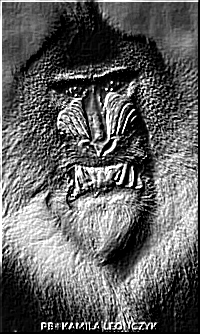

In [7]:
kernal_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

cv2_imshow(convolution2d(img_gray,kernal_emboss,1,2))

**Left Sobel Edge Detection**

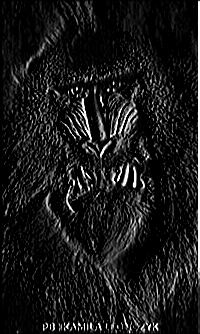

In [8]:
kernal_sobel = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])

cv2_imshow(convolution2d(img_gray,kernal_sobel,1,2))

**Canny Edge Detection**

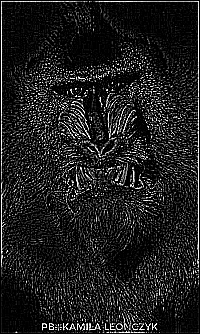

In [9]:
kernal_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

cv2_imshow(convolution2d(img_gray,kernal_canny,1,2))

**21x21 Gaussian Blur**

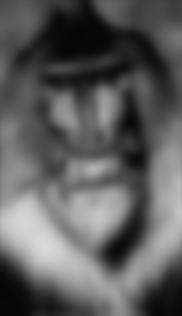

In [10]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray,gauss_kernel,1,2))